##### We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

- Goal 
   * Predict conversion rate
   * Come up with recommendations for the product team and the marketing team to improve conversion rate
- dataset 
    * country : user country based on the IP address
    * age : user age. Self-reported at sign-in step
    * new_user : whether the user created the account during this session or had already an account and simply came back to the site
    * source : marketing channel source
       ** Ads: came to the site by clicking on an advertisement
       ** Seo: came to the site by clicking on search results
       ** Direct: came to the site by directly typing the URL on the browser
    * total_pages_visited: number of total pages visited during the session
    * converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything
       ** The company goal is to increase conversion rate: # conversions / total sessions

In [39]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter('ignore')

## 1. Load Data

In [2]:
cr_df=pd.read_csv('/Datasets - DS/conversion_data.csv')
cr_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
#get summary statistics
cr_df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [4]:
#check the data structure
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
#check the missing values
cr_df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
#check the unique values in each column 
for column in cr_df.columns:
    column_unique=cr_df[column].unique()
    print(column, len(column_unique),column_unique[:5])

country 4 ['UK' 'US' 'China' 'Germany']
age 60 [25 23 28 39 30]
new_user 2 [1 0]
source 3 ['Ads' 'Seo' 'Direct']
total_pages_visited 29 [1 5 4 6 2]
converted 2 [0 1]


### 1.1. Handle outliers for age 
- typically, age should be less than 100. So check outliers and remove them.  

In [7]:
# investigae the age outliers which are those having age larger than 100
cr_df[cr_df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


######  Since there are only two outliers out of the total number of observations of 316200, it seems reasonable to remove these two points. 

In [8]:
cr_df=cr_df[cr_df['age']<100]
cr_df.age.describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

## 2. Exploratory Data Analysis 

### 2.1. Conversion rate analysis by features

#### Country

Text(0.5, 1.0, 'Mean Conversion Rate per Country')

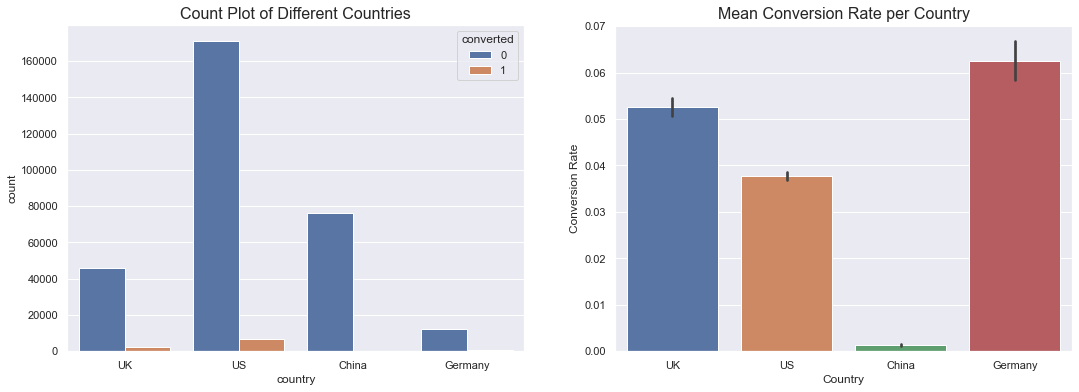

In [9]:
sns.set(style="darkgrid")
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='country',hue='converted', data=cr_df,ax=ax[0])
sns.barplot(x='country',y='converted', data=cr_df,ax=ax[1])
ax[0].set_title('Count Plot of Different Countries',fontsize=16)
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Conversion Rate')
ax[1].set_title('Mean Conversion Rate per Country',fontsize=16)

#### Age

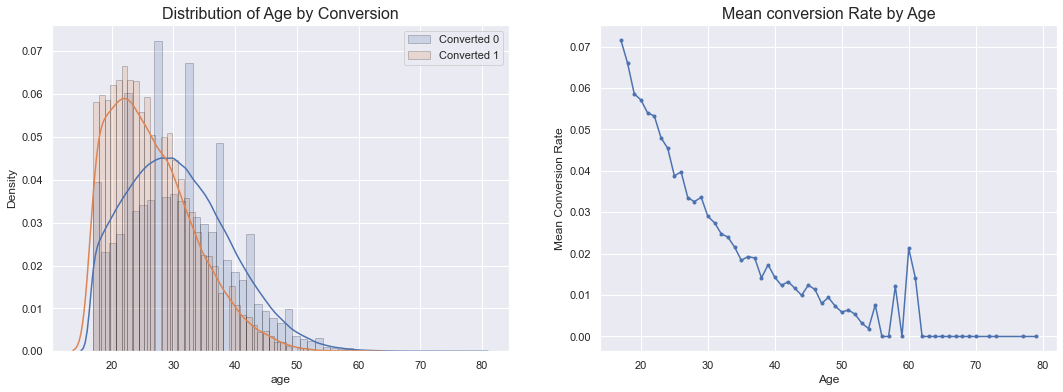

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
# The default plot kind for displot is a histogram:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.distplot(cr_df[cr_df['converted']==0]['age'],label='Converted 0',ax=ax[0],hist_kws=hist_kws)
sns.distplot(cr_df[cr_df['converted']==1]['age'],label='Converted 1',ax=ax[0],hist_kws=hist_kws)
ax[0].legend()
ax[0].set_title('Distribution of Age by Conversion',fontsize=16)

grouped=cr_df[['age','converted']].groupby('age').mean().reset_index()
ax[1].plot(grouped['age'],grouped['converted'],'.-')
ax[1].set_title('Mean conversion Rate by Age',fontsize=16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean Conversion Rate')
plt.show()

#### Total pages visited

Text(0, 0.5, 'Mean Conversion Rate')

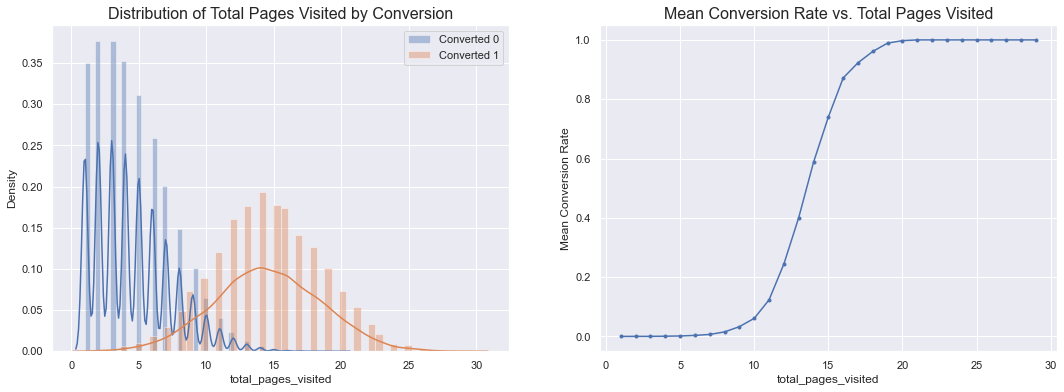

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.distplot(cr_df[cr_df['converted']==0]['total_pages_visited'],label='Converted 0',ax=ax[0])
sns.distplot(cr_df[cr_df['converted']==1]['total_pages_visited'],label='Converted 1',ax=ax[0])
ax[0].legend()
ax[0].set_title('Distribution of Total Pages Visited by Conversion',fontsize=16)
grouped_tpv=cr_df[['total_pages_visited','converted']].groupby('total_pages_visited').mean().reset_index()
ax[1].plot(grouped_tpv['total_pages_visited'],grouped_tpv['converted'],'.-')
ax[1].set_title('Mean Conversion Rate vs. Total Pages Visited',fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean Conversion Rate')

#### Source

Text(0.5, 1.0, 'Mean Conversion Rate per Source')

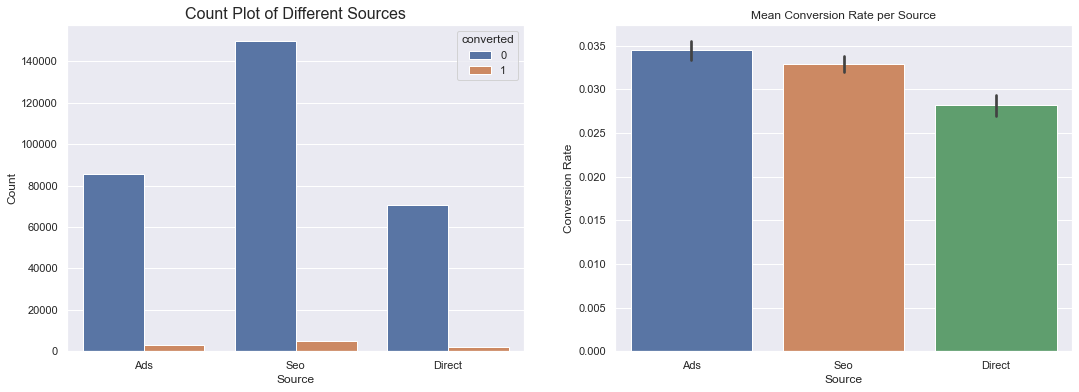

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='source',hue='converted',data=cr_df,ax=ax[0])
ax[0].set_title('Count Plot of Different Sources',fontsize=16)
ax[0].set_xlabel('Source')
ax[0].set_ylabel('Count')
sns.barplot(x='source',y='converted',data=cr_df,ax=ax[1])
ax[1].set_xlabel('Source')
ax[1].set_ylabel('Conversion Rate')
ax[1].set_title('Mean Conversion Rate per Source')

### user type (new user or not) 

Text(0.5, 1.0, 'Mean Conversion Rate per User Type')

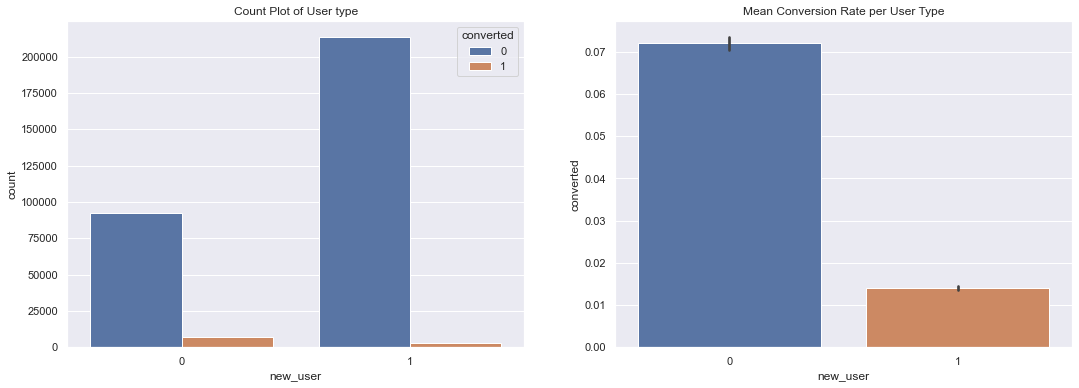

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='new_user',hue='converted',data=cr_df,ax=ax[0])
ax[0].set_title('Count Plot of User type')
sns.barplot(x='new_user',y='converted',data=cr_df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per User Type')

### 2.1 Correlation 

                          age  new_user  total_pages_visited  converted
age                  1.000000  0.012445            -0.046093  -0.089199
new_user             0.012445  1.000000            -0.082522  -0.152338
total_pages_visited -0.046093 -0.082522             1.000000   0.528975
converted           -0.089199 -0.152338             0.528975   1.000000


<AxesSubplot:>

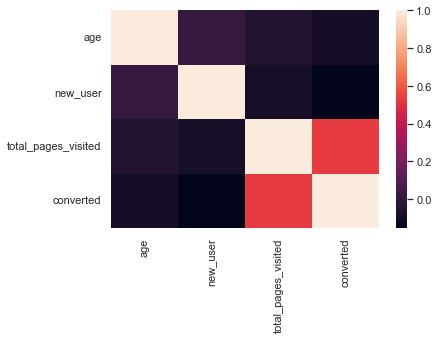

In [14]:
corr=cr_df.corr()
print(corr)
sns.heatmap(corr)

## 3. Transform the categorical variables: creating dummy variables 

In [15]:
# convert the categorical variabels Country and Source into dummy varibles 
cr_df_new=pd.get_dummies(cr_df,columns=['country','source'],drop_first=True)
y=cr_df_new['converted']
x=cr_df_new.drop(columns='converted',axis=1)

## 4. Split the training and test datasets

In [18]:
from sklearn.model_selection import train_test_split

In [29]:
# training-test data sets split 1/3 test set and 2/3 train set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1)


## 5. Building model

In [80]:
from sklearn import metrics
def evaluate_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_pred_prob=model.predict_proba(x_test)[:,1]
    # calculate accuracy, precision, recall, f1-score
    acc=metrics.accuracy_score(y_test,y_pred)
    prec=metrics.precision_score(y_test,y_pred)
    rec=metrics.recall_score(y_test,y_pred)
    f1=metrics.f1_score(y_test,y_pred)
    # calculate AUC
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
    auc=round(metrics.roc_auc_score(y_test,y_pred_prob),4)
    # calculate log loss score 
    logloss=metrics.log_loss(y_test,y_pred_prob)
    # display confussion matrix
    cm=metrics.confusion_matrix(y_test,y_pred)
    
    return {'acc':acc,'prec':prec,'rec':rec,'f1':f1,'auc':auc,'log_loss':logloss,'cm':cm,'fpr':fpr,'tpr':tpr}   

### 5.1 Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression
# build logistic regression model
logreg=LogisticRegression(random_state=1,n_jobs=-1) # logistic regression with no penalty in the cost function 
logreg.fit(x_train,y_tain)

#evaluate model 
lg_eval=evaluate_model(logreg,x_test,y_test)

#print result
print('Accuracy:',lg_eval['acc'])
print('Precision:',lg_eval['prec'])
print('Recall:',lg_eval['rec'])
print('F1 Score:',lg_eval['f1'])
print('Log Loss Score:',lg_eval['log_loss'])
print('Area Under Curve:',lg_eval['auc'])
print('Confusion Matrix:\n',lg_eval['cm'])

Accuracy: 0.986100569259962
Precision: 0.8532176428054953
Recall: 0.6902603100321731
F1 Score: 0.7631366208569118
Log Loss Score: 0.04059680257657747
Area Under Curve: 0.9863
Confusion Matrix:
 [[101575    406]
 [  1059   2360]]


### 5.2 Random forest 

In [82]:
# build random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_jobs=-1)
rf.fit(x_train,y_tain)
#evaluate model 
rf_eval=evaluate_model(rf,x_test,y_test)

#print result
print('Accuracy:{:.3f}'.format(rf_eval['acc']))
print('Precision:{:.3f}'.format(rf_eval['prec']))
print('Recall:{:.3f}'.format(rf_eval['rec']))
print('F1 Score:{:.3f}'.format(rf_eval['f1']))
print('Area Under Curve:{:.3f}'.format(rf_eval['auc']))
print('Confusion Matrix:\n',rf_eval['cm'])



Accuracy:0.984
Precision:0.803
Recall:0.670
F1 Score:0.730
Area Under Curve:0.949
Confusion Matrix:
 [[101418    563]
 [  1128   2291]]


### 5.3 Model comparison 

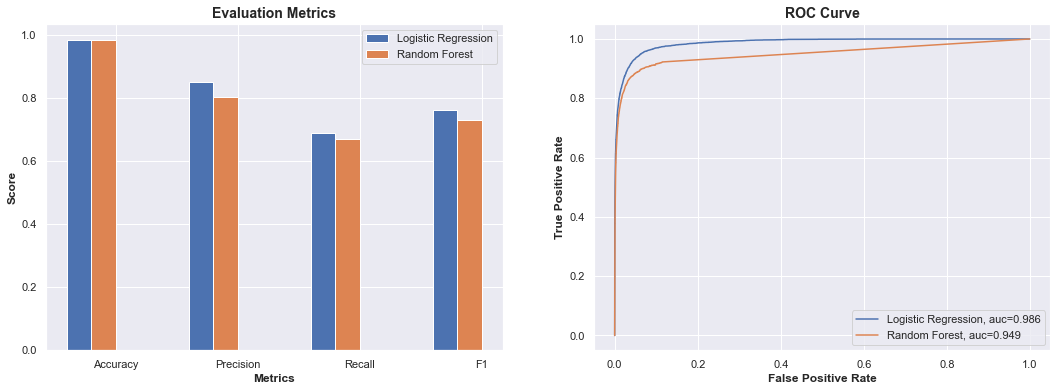

In [83]:
# initialize figure with two plots
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))

# first plot
barWidth=0.2
lg_score=[lg_eval['acc'],lg_eval['prec'],lg_eval['rec'],lg_eval['f1']]
rf_score=[rf_eval['acc'],rf_eval['prec'],rf_eval['rec'],rf_eval['f1']]

r1=np.arange(len(lg_score))
r2=[x+barWidth for x in r1]
ax[0].bar(r1,lg_score,width=barWidth,edgecolor='white',label='Logistic Regression')
ax[0].bar(r2,rf_score,width=barWidth,edgecolor='white',label='Random Forest')

ax[0].set_xlabel('Metrics',fontweight='bold')
ax[0].set_xticks([r + (barWidth * 1.5) for r in range(len(lg_score))], )
labels=['Accuracy', 'Precision', 'Recall', 'F1']
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Score',fontweight='bold')
ax[0].set_title('Evaluation Metrics',fontsize=14,fontweight='bold')
ax[0].legend()

# second plot
ax[1].plot(lg_eval['fpr'],lg_eval['tpr'],label='Logistic Regression, auc={:.3f}'.format(lg_eval['auc']))
ax[1].plot(rf_eval['fpr'],rf_eval['tpr'],label='Random Forest, auc={:.3f}'.format(rf_eval['auc']))
ax[1].set_title('ROC Curve',fontsize=14,fontweight='bold')
ax[1].set_xlabel('False Positive Rate',fontweight='bold')
ax[1].set_ylabel('True Positive Rate',fontweight='bold')
ax[1].legend()

plt.show()

#### From the figures above we can see that the logistic regression model shows the best performance out of the selected models. We will choose the logistic regression for further improvement. 

## 6. Model optimization
#### We will try to optimise our logistic regression model by tuning the hyper parameters. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

### 6.1 Hyperparameter tuning with GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':np.logspace(-4,4,20),'penalty':['l1','l2']} 
lg_gridcv=GridSearchCV(logreg,param_grid,cv=5,n_jobs=-1)
lg_gridcv.fit(x_train,y_train)
#find the best combinations
print('best hyperparameters:',lg_gridcv.best_params_)
print('accuracy:',lg_gridcv.best_score_)

best hyperparameters: {'C': 10000.0, 'penalty': 'l2'}
accuracy: 0.9861905682981205


In [105]:
# evaluate model
lg_best=evaluate_model(lg_gridcv.best_estimator_,x_test,y_test)

#print result
print('Accuracy:',lg_best['acc'])
print('Precision:',lg_best['prec'])
print('Recall:',lg_best['rec'])
print('F1 Score:',lg_best['f1'])
print('Area Under Curve:',lg_best['auc'])
print('Confusion Matrix:\n',lg_best['cm'])

Accuracy: 0.9860815939278937
Precision: 0.8528561099060015
Recall: 0.6899678268499562
F1 Score: 0.7628132578819726
Area Under Curve: 0.9864
Confusion Matrix:
 [[101574    407]
 [  1060   2359]]


### 6.2 Model comparison - Logistic regression base and optimized models 

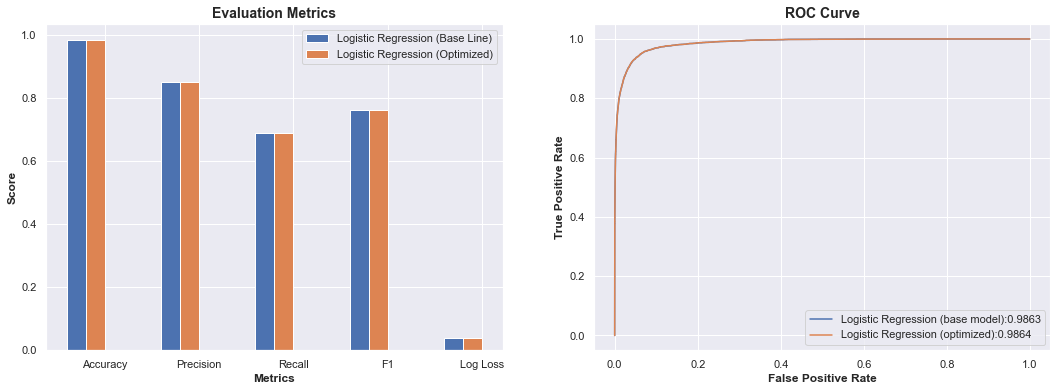

In [106]:
# initialize figure with two plots
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
barWidth=0.2
lg_score=[lg_eval['acc'],lg_eval['prec'],lg_eval['rec'],lg_eval['f1'],lg_eval['log_loss']]
lg_best_score=[lg_best['acc'],lg_best['prec'],lg_best['rec'],lg_best['f1'],lg_best['log_loss']]

r1=np.arange(len(lg_score))
r2=[x+barWidth for x in r1]
ax[0].bar(r1,lg_score,width=barWidth,edgecolor='white',label='Logistic Regression (Base Line)')
ax[0].bar(r2,lg_best_score,width=barWidth,edgecolor='white',label='Logistic Regression (Optimized)')


ax[0].set_xlabel('Metrics',fontweight='bold')
ax[0].set_xticks([r + (barWidth * 1.5) for r in range(len(lg_score))], )
labels=['Accuracy', 'Precision', 'Recall', 'F1','Log Loss']
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Score',fontweight='bold')
ax[0].set_title('Evaluation Metrics',fontsize=14,fontweight='bold')
ax[0].legend()

# second plot
ax[1].plot(lg_eval['fpr'],lg_eval['tpr'],label='Logistic Regression (base model):'+ str(lg_eval['auc']))
ax[1].plot(lg_best['fpr'],lg_best['tpr'],label='Logistic Regression (optimized):'+ str(lg_best['auc']))
ax[1].set_title('ROC Curve',fontsize=14,fontweight='bold')
ax[1].set_xlabel('False Positive Rate',fontweight='bold')
ax[1].set_ylabel('True Positive Rate',fontweight='bold')
ax[1].legend()

plt.show()

#### From the figures above, there is not much improvement for the optimized logistic regression. 

### 6.3 Feature importance 

### 6.3.1 Obtained importance from coefficients 

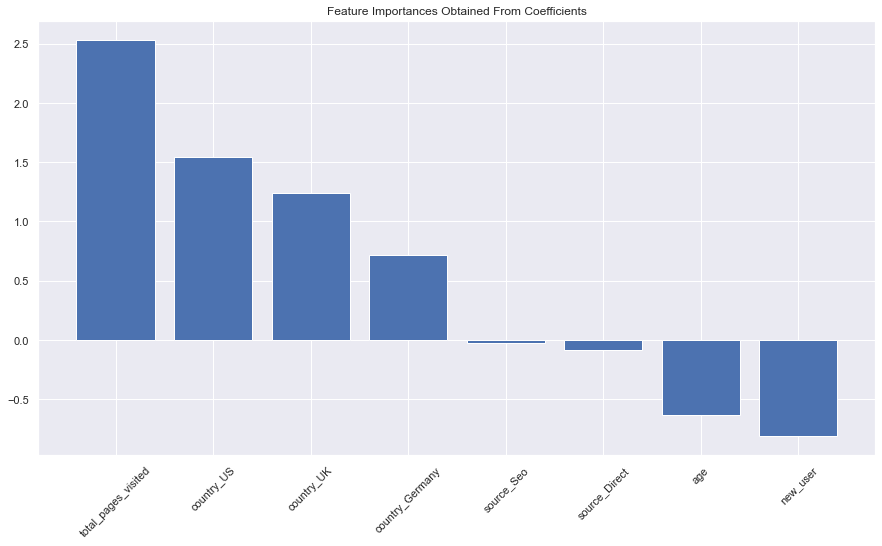

In [128]:
from sklearn.preprocessing import StandardScaler
# define standard scalar
ss=StandardScaler()
#transform 
x_train_scaled=ss.fit_transform(x_train)

model=LogisticRegression(random_state=1,n_jobs=-1)
model.fit(x_train_scaled,y_train)
importances=pd.DataFrame(data={'Attributes':x_train.columns,'Importance':model.coef_[0]})
importances=importances.sort_values(by='Importance',ascending=False)

# plot feature importance
plt.figure(figsize=(15,8))
plt.bar(importances['Attributes'],importances['Importance'])
plt.title('Feature Importances Obtained From Coefficients')
plt.xticks(rotation=45)
plt.show()

### 6.3.2 Random Forest built-in feature importance 

Text(0.5, 1.0, 'Random Forest Feature Importances')

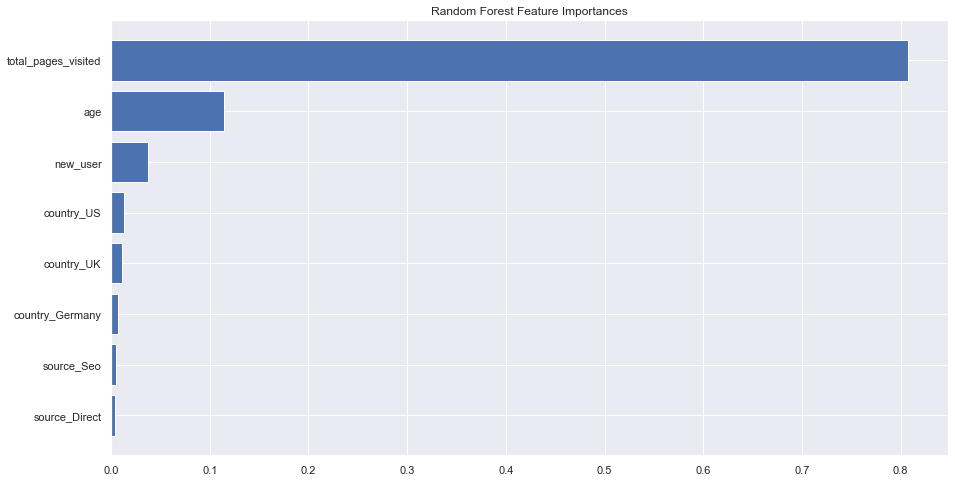

In [135]:
plt.figure(figsize=(15,8))
sort_index=np.argsort(rf.feature_importances_)
plt.barh(x_train.columns[sort_index],rf.feature_importances_[sort_index])
plt.title('Random Forest Feature Importances')

#### Based on the feature importances plot, we can see that total_pages_visited, new_user, age are among the import variables to make predcitions. 